## Importing & Loading What We Need 

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score

# Loading our dataset
data = pd.read_csv('EExpanded_Biometric_Static_New.csv')

In [54]:
data = data.drop(columns = ['Club', 'Player Name','Player ID','Team', 'League'])

In [55]:
# Initialize a dictionary to store LabelEncoders for each categorical column
label_encoders = {}

# List of categorical columns to encode
categorical_columns = ['Position', 'Status','Heart Rate Zone']

# Encode each categorical column
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])  # Transform categorical values into numeric
    label_encoders[col] = le  # Save the encoder for later use

In [56]:
# Drop irrelevant columns and separate the target column ('Status')
X = data[['Fatigue Score', 'Injury Risk','Readiness Score']]
y = data['Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_scaled = scaler.transform(X)  # Scale full dataset for cross-validation

In [58]:
# Initialize an SVM classifier with a linear kernel
ran_model = RandomForestClassifier(random_state=2, n_estimators = 50)

# Train the SVM model on the training data
ran_model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=50, random_state=2)

In [59]:
# Predict the target variable for the test set
y_pred = ran_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

# Generate a classification report for detailed metrics
classification_report_text = classification_report(y_test, y_pred, target_names=label_encoders['Status'].classes_)
print("Classification Report:\n", classification_report_text)


Model Accuracy: 0.9929078014184397
Classification Report:
                  precision    recall  f1-score   support

        At Risk       1.00      0.97      0.99        74
        Optimal       1.00      1.00      1.00       112
     Recovering       0.97      1.00      0.99        66
Underperforming       1.00      1.00      1.00        30

       accuracy                           0.99       282
      macro avg       0.99      0.99      0.99       282
   weighted avg       0.99      0.99      0.99       282



In [60]:
# Perform k-fold cross-validation with k=5
k = 5
cross_val_scores = cross_val_score(ran_model, X_scaled, y, cv=k)

# Calculate the mean and standard deviation of the cross-validation scores
cv_mean = cross_val_scores.mean()
cv_std = cross_val_scores.std()

# Predict the target variable for the test set
y_pred = ran_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Generate a classification report for detailed metrics
classification_report_text = classification_report(y_test, y_pred, target_names=label_encoders['Status'].classes_)

print(f"\nAccuracy of the model: {accuracy * 100:.2f}%")
print(f"\nMean Cross-Validation Score (k=5): {cv_mean * 100:.2f}%") 
print(f"\nStandard Deviation: {cv_std }") 
print(f"\nScores per Fold: {cross_val_scores}") 
print(f"\nClassification Report: {classification_report_text}")


Accuracy of the model: 99.29%

Mean Cross-Validation Score (k=5): 99.36%

Standard Deviation: 0.008510638297872348

Scores per Fold: [0.9787234 0.9893617 1.        1.        1.       ]

Classification Report:                  precision    recall  f1-score   support

        At Risk       1.00      0.97      0.99        74
        Optimal       1.00      1.00      1.00       112
     Recovering       0.97      1.00      0.99        66
Underperforming       1.00      1.00      1.00        30

       accuracy                           0.99       282
      macro avg       0.99      0.99      0.99       282
   weighted avg       0.99      0.99      0.99       282



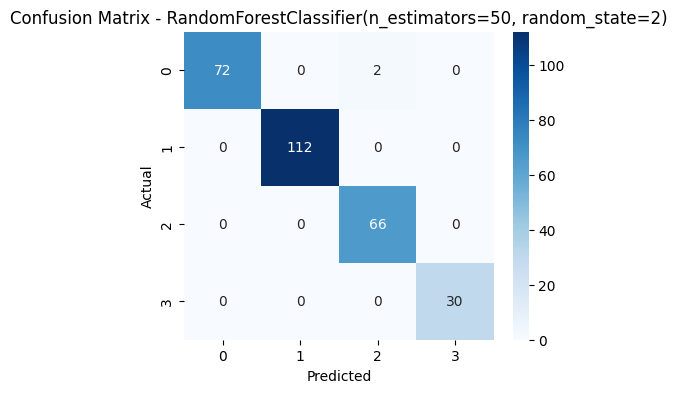

In [61]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {ran_model}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [62]:
with open("ran_model.pkl", "wb") as model_file:
    pickle.dump(ran_model, model_file)

# Save the scaler
with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)